Recall: the hyperparameters are t, n_estimators and max_depth.
The goal here is to find the best hyper-parameters values.
To do so, we take files minitrain.cs and minitest.csv to cross-validate.
For different values of hyperparameters, we display the values in a 4d graph.

In [1]:
import pandas as pd
from Train_n_test import ExtractTrainValidateTest

#training_file = "/media/storage/Ecole/Insa-5e_annee/pdc_videogames/input/minitrain.csv"
#validation_file = "/media/storage/Ecole/Insa-5e_annee/pdc_videogames/input/minitest.csv"
training_file = "D:\DATA\Documents\INFO\VideoGames\minitrain.csv"
validation_file = "D:\DATA\Documents\INFO\VideoGames\minitest.csv"

# Sampling hyper-parameters' values (design points).
To sample, have to change the lists manually by zooming each time. Otherwise, it will be too long.
Extracting data is the most costly => changing t's value is the most costly.

In [2]:
f = 4

t_list = [] # 5 is initial value
next_val= 5
factor = f*2
while (next_val < 3600):
    t_list.append(next_val)
    next_val*=factor
print(t_list)


# Sampling n_estimators
n_estimators_list = []
next_val= 1
factor = f
while (next_val < 500):
    n_estimators_list.append(next_val)
    next_val*=factor
print(n_estimators_list)


# Sampling max_depth
max_depth_list = []
next_val= 2
factor = f
while (next_val < 2000):
    max_depth_list.append(next_val)
    next_val*=factor
print(max_depth_list)

[5, 40, 320, 2560]
[1, 4, 16, 64, 256]
[2, 8, 32, 128, 512]


## Second Zoom :

In [3]:
t_list = [50, 100,500,1000] 


## Third Zoom : 

In [4]:
t_list = [200, 300, 400,500,600,700] 

## T=300, zoom estimators 

In [5]:
t_list=[300]

n_estimators_list = [64,256,512,1024]

## N_estimators = 64, zoom max_depth

In [6]:
n_estimators_list = [64]
max_depth_list = [2, 8, 32, 128, 512, 1024]

# Filling the accuracies values obtained with different values for the design points
TODO: plutôt faire plusieurs run de ça et avoir une moyenne, car il y a de l'aléa.

In [5]:
import time

start_time = time.time()
#accuracies = [] # a 2d-list. One line is a list with 5 values: t, n_estimators, max_depth, accuracy and training time.
accuracies = [] # a 2d-list. One line is a list with 4 values: t, n_estimators, max_depth, and accuracy
etvt = ExtractTrainValidateTest()
for t in t_list:
    etvt.extract_and_process_df(t, training_file, validation_file)
    for n_estimators in n_estimators_list:
        for max_depth in max_depth_list:
            etvt.init_tnv(n_estimators, max_depth)
            #training_time = etvt.train()
            etvt.train()
            acc = etvt.validate()
            #accuracies.append([t, n_estimators, max_depth, accuracy, training_time])
            accuracies.append([t, n_estimators, max_depth, acc])
            print("Added element", [t, n_estimators, max_depth, acc])
print(accuracies)
print("Time spent here:", (time.time()-start_time)/60 , "minutes")

Added element [200, 1, 2, 0.0]
Added element [200, 1, 8, 5.187319884726225]
Added element [200, 1, 32, 70.02881844380403]
Added element [200, 1, 128, 62.53602305475504]
Added element [200, 1, 512, 77.52161383285303]
Added element [200, 4, 2, 7.204610951008646]
Added element [200, 4, 8, 40.63400576368876]
Added element [200, 4, 32, 84.14985590778097]
Added element [200, 4, 128, 81.26801152737752]
Added element [200, 4, 512, 75.79250720461094]
Added element [200, 16, 2, 15.561959654178676]
Added element [200, 16, 8, 59.36599423631124]
Added element [200, 16, 32, 88.76080691642652]
Added element [200, 16, 128, 89.62536023054754]
Added element [200, 16, 512, 88.76080691642652]
Added element [200, 64, 2, 9.221902017291066]
Added element [200, 64, 8, 63.976945244956774]
Added element [200, 64, 32, 91.06628242074927]
Added element [200, 64, 128, 90.77809798270894]
Added element [200, 64, 512, 90.48991354466858]
Added element [200, 256, 2, 11.239193083573488]
Added element [200, 256, 8, 64.553

# Displaying the tuples [t, n_estimators, max_depth, accuracy] with best accuraries

In [6]:
df_accuracies = pd.DataFrame(data=accuracies, columns=["t limit", "n_estimators", "max_depth", "accuracy"])
df_accuracies.head()

# sorting the elements by accuracy value
sorted_df_accuracies = df_accuracies.sort_values("accuracy", ascending=False) # sort function is deprecated
print("The elements containing the best configurations:")
sorted_df_accuracies.head(100)

The elements containing the best configurations:


,t limit,n_estimators,max_depth,accuracy
44,300,64,512,93.948127
49,300,256,512,93.659942
42,300,64,32,92.795389
98,500,256,128,92.219020
43,300,64,128,91.930836
48,300,256,128,91.930836
47,300,256,32,91.930836
93,500,64,128,91.642651
97,500,256,32,91.642651
89,500,16,512,91.354467


# Building graphic from the obtained 2d-list

In [7]:
%matplotlib inline
from matplotlib import interactive
interactive(True)

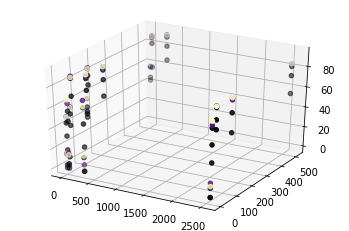

In [8]:
# inspired from https://stackoverflow.com/questions/14995610/how-to-make-a-4d-plot-with-matplotlib-using-arbitrary-data


from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

"""fig = plt.figure()
ax = fig.gca(projection='3d')
X = accuracies[:,0]
Y = accuracies[:,2]
X, Y = np.meshgrid(X, Y)
Z = accuracies[:,3]
N = accuracies[:,1]
surf = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1,
    facecolors=cm.jet(N),
    linewidth=0, antialiased=False, shade=False)
"""

accuracies = np.array(accuracies)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = accuracies[:,0]
y = accuracies[:,2]
z = accuracies[:,3]
c = accuracies[:,1]
ax.scatter(x, y, z, c=c, cmap="magma")

plt.show()

AttributeError: Unknown property cmap

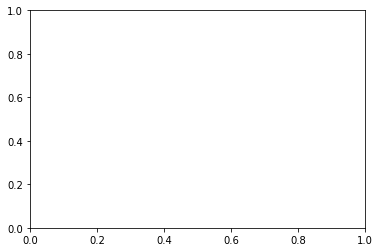

In [9]:

x = accuracies[:,0]
y = accuracies[:,2]
z = accuracies[:,3]
c = accuracies[:,1]
plt.plot(x, y, z, c=c, cmap="magma")

# Draft